# Worldwide soybean production

Our objective is to understand what countries are the main producers of soybeans.
Our aim is to select the top main producers to provide a statistical analysis of its production of soybeans on the futures prices

### Dataset source:

[Foreign Agricultural Service (FAS)](https://apps.fas.usda.gov/psdonline/app/index.html#/app/advQuery)


[Statista Data for the US Production](https://www.statista.com/statistics/192058/production-of-soybeans-for-beans-in-the-us-since-2000/)

## imports utilizados no projeto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Download Datasets

In [2]:
!pwd

/Users/vanessalieberg/code/Megeve2022/project_commodity_prices/notebooks


In [3]:
# Datasets

#Producer Prices
# Agriculture Producer Prices are prices received by farmers for primary crops,
#live animals and livestock primary products as collected at the point of initial sale 
#(prices paid at the farm-gate). 

# 1. Producers prices
df_prices = pd.read_csv("../raw_data/FAS_prices/FAOSTAT_Producers_price_data_3-22-2022.csv")
df_prices.head()

# df_stock.rename(columns={'Area Code (FAO)': "Area Code", "Item Code (CPC)": "Item Code"}, inplace= True)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,1996,1996,7021,Annual value,USD,478,NaN,Official data
1,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,1997,1997,7021,Annual value,USD,336,NaN,Official data
2,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,1998,1998,7021,Annual value,USD,332,NaN,Official data
3,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,1999,1999,7021,Annual value,USD,436,NaN,Official data
4,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),236,Soybeans,2000,2000,7021,Annual value,USD,487,NaN,Official data


In [64]:
df_prices.shape

(1371, 3)

In [4]:
df_prices = df_prices[['Area', 'Year', 'Value']]
df_prices.rename(columns={'Value': "Producer_price (USD/tonne)", 'Area': 'Country'}, inplace= True)

df_prices.head()


,Country,Year,Producer_price (USD/tonne)
0,Albania,1996,478
1,Albania,1997,336
2,Albania,1998,332
3,Albania,1999,436
4,Albania,2000,487


In [5]:
# 2. Total Population
df_pop = pd.read_csv("../raw_data/FAS_prices/FAOSTAT_Population_data_3-22-2022.csv")
df_pop = df_pop[['Area', 'Year', 'Value']]
df_pop.rename(columns={'Value': "Population (1000 persons)", 'Area': 'Country'}, inplace= True)
df_pop.head(3)

,Country,Year,Population (1000 persons)
0,Afghanistan,1950,7752.118
1,Afghanistan,1951,7840.156
2,Afghanistan,1952,7935.997


In [6]:
# 3. Urban Population
df_pop_urban = pd.read_csv("../raw_data/FAS_prices/FAOSTAT_Pop_Urban_data_3-22-2022.csv")
df_pop_urban = df_pop_urban[['Area', 'Year', 'Value']]
df_pop_urban.rename(columns={'Value': "Urban Population (1000 persons)", 'Area': 'Country'}, inplace= True)
df_pop_urban.head()

,Country,Year,Urban Population (1000 persons)
0,Afghanistan,1950,465.127
1,Afghanistan,1951,486.654
2,Afghanistan,1952,509.617
3,Afghanistan,1953,534.035
4,Afghanistan,1954,560.077


In [7]:
# 4. Area Harvested
df_area_harvested = pd.read_csv("../raw_data/FAS_soybeans_Crop_details/FAOSTAT_Area_harvested_data_3-22-2022.csv")
df_area_harvested = df_area_harvested[['Area', 'Year', 'Value']]
df_area_harvested.rename(columns={'Value': "Area_harvested (ha)", 'Area': 'Country'}, inplace= True)
df_area_harvested.head()

,Country,Year,Area_harvested (ha)
0,Albania,1980,6000.0
1,Albania,1981,6000.0
2,Albania,1982,6000.0
3,Albania,1983,5000.0
4,Albania,1984,5000.0


In [8]:
# 5. Gross Productivity Value
df_gross_prod_value = pd.read_csv("../raw_data/FAS_soybeans_Crop_details/FAOSTAT_Gross_Prod_Value_data_3-22-2022.csv")
df_gross_prod_value = df_gross_prod_value[['Area', 'Year', 'Value']]
df_gross_prod_value.rename(columns={'Value': "Value Agr. Production (1000 US$)", 'Area': 'Country'}, inplace= True)
df_gross_prod_value.head()

,Country,Year,Value Agr. Production (1000 US$)
0,Albania,1980,4551
1,Albania,1981,4930
2,Albania,1982,5688
3,Albania,1983,5309
4,Albania,1984,5688


In [9]:
# 6. Production
df_production = pd.read_csv("../raw_data/FAS_soybeans_Crop_details/FAOSTAT_Production_data_3-22-2022.csv")
df_production = df_production[['Area', 'Year', 'Value']]
df_production.rename(columns={'Value': "Production (tonnes)", 'Area': 'Country'}, inplace= True)
df_production.head()

,Country,Year,Production (tonnes)
0,Albania,1980,6000.0
1,Albania,1981,6500.0
2,Albania,1982,7500.0
3,Albania,1983,7000.0
4,Albania,1984,7500.0


In [10]:
# 7. Yield
df_yield = pd.read_csv("../raw_data/FAS_soybeans_Crop_details/FAOSTAT_Yield_data_3-22-2022.csv")
df_yield = df_yield[['Area', 'Year', 'Value']]
df_yield.rename(columns={'Value': "Yield (hg/ha)", 'Area': 'Country'}, inplace= True)
df_yield.head()

,Country,Year,Yield (hg/ha)
0,Albania,1980,10000
1,Albania,1981,10833
2,Albania,1982,12500
3,Albania,1983,14000
4,Albania,1984,15000


In [11]:
# 8. Domestic Supply
df_domestic_supply = pd.read_csv("../raw_data/FAS_soybean_data/FAOSTAT_Domestic_supply_data_3-22-2022.csv")
df_domestic_supply = df_domestic_supply[['Area', 'Year', 'Value']]
df_domestic_supply.rename(columns={'Value': "Domestic supply quantity (1000 tonnes)", 'Area': 'Country'}, inplace= True)
df_domestic_supply.head()

,Country,Year,Domestic supply quantity (1000 tonnes)
0,Afghanistan,2010,0
1,Afghanistan,2011,0
2,Afghanistan,2012,0
3,Afghanistan,2013,0
4,Afghanistan,2014,0


In [12]:
# 9. Export Data: FAOSTAT_Export_data_3-22-2022
df_export = pd.read_csv("../raw_data/FAS_soybean_data/FAOSTAT_Export_data_3-22-2022.csv")
df_export = df_export[['Area', 'Year', 'Value']]
df_export.rename(columns={'Value': "Export Quantity (1000 tonnes)", 'Area': 'Country'}, inplace= True)
df_export.head()


,Country,Year,Export Quantity (1000 tonnes)
0,Afghanistan,2014,0
1,Afghanistan,2015,0
2,Afghanistan,2016,0
3,Afghanistan,2017,0
4,Afghanistan,2018,0


In [13]:
# 10. Feed : FAOSTAT_Feed_data_3-22-2022
df_feed = pd.read_csv("../raw_data/FAS_soybean_data/FAOSTAT_Feed_data_3-22-2022.csv")
df_feed = df_feed[['Area', 'Year', 'Value']]
df_feed.rename(columns={'Value': "Feed (1000 tonnes)", 'Area': 'Country'}, inplace= True)
df_feed.head()

,Country,Year,Feed (1000 tonnes)
0,Afghanistan,2014,0
1,Afghanistan,2015,0
2,Afghanistan,2016,0
3,Afghanistan,2017,0
4,Afghanistan,2018,0


In [14]:
# 11. Food : FAOSTAT_Food_data_3-22-2022
df_food = pd.read_csv("../raw_data/FAS_soybean_data/FAOSTAT_Food_data_3-22-2022.csv")
df_food = df_food[['Area', 'Year', 'Value']]
df_food.rename(columns={'Value': "Food (1000 tonnes)", 'Area': 'Country'}, inplace= True)
df_food.head()

,Country,Year,Food (1000 tonnes)
0,Afghanistan,2014,0
1,Afghanistan,2015,0
2,Afghanistan,2016,0
3,Afghanistan,2017,0
4,Afghanistan,2018,0


In [15]:
# 12. Import : FAOSTAT_Import_data_3-22-2022
df_import = pd.read_csv("../raw_data/FAS_soybean_data/FAOSTAT_Import_data_3-22-2022.csv")
df_import = df_import[['Area', 'Year', 'Value']]
df_import.rename(columns={'Value': "Import Qty (1000 tonnes)", 'Area': 'Country'}, inplace= True)
df_import.head()

,Country,Year,Import Qty (1000 tonnes)
0,Afghanistan,2014,0
1,Afghanistan,2015,0
2,Afghanistan,2016,0
3,Afghanistan,2017,0
4,Afghanistan,2018,0


In [16]:
# 13. Losses : FAOSTAT_Losses_data_3-22-2022
df_losses = pd.read_csv("../raw_data/FAS_soybean_data/FAOSTAT_Losses_data_3-22-2022.csv")
df_losses = df_losses[['Area', 'Year', 'Value']]
df_losses.rename(columns={'Value': "Losses (1000 tonnes)", 'Area': 'Country'}, inplace= True)
df_losses.head()

,Country,Year,Losses (1000 tonnes)
0,Albania,2010,0
1,Albania,2011,0
2,Albania,2012,0
3,Albania,2013,0
4,Albania,2014,0


In [17]:
# 14. Other_uses : FAOSTAT_Other_uses_data_3-22-2022
df_other_uses = pd.read_csv("../raw_data/FAS_soybean_data/FAOSTAT_Other_uses_data_3-22-2022.csv")
df_other_uses = df_other_uses[['Area', 'Year', 'Value']]
df_other_uses.rename(columns={'Value': "Other uses/non-food (1000 tonnes)", 'Area': 'Country'}, inplace= True)
df_other_uses.head()

,Country,Year,Other uses/non-food (1000 tonnes)
0,Antigua and Barbuda,2014,0.0
1,Antigua and Barbuda,2015,0.0
2,Antigua and Barbuda,2016,0.0
3,Antigua and Barbuda,2017,0.0
4,Antigua and Barbuda,2018,0.0


In [18]:
# 15. Other_uses : FAOSTAT_Processed_data_3-22-2022
df_processed = pd.read_csv("../raw_data/FAS_soybean_data/FAOSTAT_Processed_data_3-22-2022.csv")
df_processed = df_processed[['Area', 'Year', 'Value']]
df_processed.rename(columns={'Value': "Processing (1000 tonnes)", 'Area': 'Country'}, inplace= True)
df_processed.head()

,Country,Year,Processing (1000 tonnes)
0,Afghanistan,2010,0
1,Afghanistan,2011,0
2,Afghanistan,2012,0
3,Afghanistan,2013,0
4,Albania,2010,0


In [19]:
# 16. Production : FAOSTAT_Production_data_3-22-2022
df_production2 = pd.read_csv("../raw_data/FAS_soybean_data/FAOSTAT_Production_data_3-22-2022.csv")
df_production2 = df_production2[['Area', 'Year', 'Value']]
df_production2.rename(columns={'Value': "Production (1000 tonnes)", 'Area': 'Country'}, inplace= True)
df_production2.head()

,Country,Year,Production (1000 tonnes)
0,Afghanistan,2010,0
1,Afghanistan,2011,0
2,Afghanistan,2012,0
3,Afghanistan,2013,0
4,Albania,2010,1


In [20]:
# 17. Residuals : FAOSTAT_Residuals_data_3-22-2022
df_residuals = pd.read_csv("../raw_data/FAS_soybean_data/FAOSTAT_Residuals_data_3-22-2022.csv")
df_residuals = df_residuals[['Area', 'Year', 'Value']]
df_residuals.rename(columns={'Value': "Residuals (1000 tonnes)", 'Area': 'Country'}, inplace= True)
df_residuals.head()

,Country,Year,Residuals (1000 tonnes)
0,Afghanistan,2010,0
1,Afghanistan,2011,0
2,Afghanistan,2012,0
3,Afghanistan,2013,0
4,Afghanistan,2014,0


In [21]:
# 18. Seed : FAOSTAT_Seed_data_3-22-2022
df_seed = pd.read_csv("../raw_data/FAS_soybean_data/FAOSTAT_Seed_data_3-22-2022.csv")
df_seed = df_seed[['Area', 'Year', 'Value']]
df_seed.rename(columns={'Value': "Seed (1000 tonnes)", 'Area': 'Country'}, inplace= True)
df_seed.head()

,Country,Year,Seed (1000 tonnes)
0,Albania,2010,0
1,Albania,2011,0
2,Albania,2012,0
3,Albania,2013,0
4,Albania,2014,0


# Merge of the datasets by Year and Country

In [68]:
df = df_prices.merge(df_area_harvested, on =['Year', 'Country'], how = 'left' )
df = df.merge(df_gross_prod_value, on =['Year', 'Country'], how = 'left' )
df = df.merge(df_production, on =['Year', 'Country'], how = 'left' )
df = df.merge(df_yield, on =['Year', 'Country'], how = 'left' )
df = df.merge(df_domestic_supply, on =['Year', 'Country'], how = 'left' )
df = df.merge(df_export, on =['Year', 'Country'], how = 'left' )
df = df.merge(df_feed, on =['Year', 'Country'], how = 'left' )
df = df.merge(df_food, on =['Year', 'Country'], how = 'left' )
df = df.merge(df_import, on =['Year', 'Country'], how = 'left' )
df = df.merge(df_losses, on =['Year', 'Country'], how = 'left' )
#df = df.merge(df_other_uses, on =['Year', 'Country'], how = 'left' )
df = df.merge(df_processed, on =['Year', 'Country'], how = 'left' )
df = df.merge(df_production2, on =['Year', 'Country'], how = 'left' )
df = df.merge(df_residuals, on =['Year', 'Country'], how = 'left' )
df = df.merge(df_seed, on =['Year', 'Country'], how = 'left' )
df = df.merge(df_pop, on =['Year', 'Country'], how = 'left' )
df = df.merge(df_pop_urban, on =['Year', 'Country'], how = 'left' )
df.head()

,Country,Year,Producer_price (USD/tonne),Area_harvested (ha),Value Agr. Production (1000 US$),Production (tonnes),Yield (hg/ha),Domestic supply quantity (1000 tonnes),Export Quantity (1000 tonnes),Feed (1000 tonnes),Food (1000 tonnes),Import Qty (1000 tonnes),Losses (1000 tonnes),Processing (1000 tonnes),Production (1000 tonnes),Residuals (1000 tonnes),Seed (1000 tonnes),Population (1000 persons),Urban Population (1000 persons)
0,Albania,1996,478,177.0,208.0,274.0,15480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3098.700,1220.583
1,Albania,1997,336,177.0,171.0,226.0,12768.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3099.752,1238.301
2,Albania,1998,332,104.0,113.0,149.0,14327.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3110.682,1260.155
3,Albania,1999,436,700.0,910.0,1200.0,17143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3122.697,1282.662
4,Albania,2000,487,400.0,455.0,600.0,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3129.243,1303.137


In [69]:
df.shape

(1371, 19)

##### Fazer uns graficos legais 
*1 Desenhar o front end

*2 Grafico de mapa e de barra /n

Pesquisa por pais e producao (iterativo!!!)

Geomap! Grafico

Evolucao por ano: producao/consumo/stock



In [77]:
# Verificando os Nan
df.isnull().sum().sort_values(ascending=False) #NaN count for each column

df.isnull().sum().sort_values(ascending=False)/len(df) #NaN percentage for each column

Feed (1000 tonnes)                        0.705325
Processing (1000 tonnes)                  0.693654
Seed (1000 tonnes)                        0.679796
Losses (1000 tonnes)                      0.668125
Export Quantity (1000 tonnes)             0.666667
Import Qty (1000 tonnes)                  0.661561
Residuals (1000 tonnes)                   0.658643
Production (1000 tonnes)                  0.658643
Domestic supply quantity (1000 tonnes)    0.658643
Food (1000 tonnes)                        0.658643
Population (1000 persons)                 0.055434
Urban Population (1000 persons)           0.055434
Value Agr. Production (1000 US$)          0.040846
Yield (hg/ha)                             0.004376
Production (tonnes)                       0.004376
Area_harvested (ha)                       0.004376
Year                                      0.000000
Producer_price (USD/tonne)                0.000000
Country                                   0.000000
dtype: float64

In [71]:
df.corr()

,Year,Producer_price (USD/tonne),Area_harvested (ha),Value Agr. Production (1000 US$),Production (tonnes),Yield (hg/ha),Domestic supply quantity (1000 tonnes),Export Quantity (1000 tonnes),Feed (1000 tonnes),Food (1000 tonnes),Import Qty (1000 tonnes),Losses (1000 tonnes),Processing (1000 tonnes),Production (1000 tonnes),Residuals (1000 tonnes),Seed (1000 tonnes),Population (1000 persons),Urban Population (1000 persons)
Year,1.000000,0.152511,0.039763,0.055100,0.065078,0.185683,0.030167,0.046107,0.008566,0.033744,0.052107,0.031355,0.046596,0.018618,-0.092626,0.020919,-0.001990,0.047745
Producer_price (USD/tonne),0.152511,1.000000,-0.111116,-0.089825,-0.100223,-0.204808,-0.051669,-0.120416,0.023499,0.094590,0.047218,-0.088055,-0.040335,-0.126510,0.042397,-0.121313,-0.020630,0.016172
Area_harvested (ha),0.039763,-0.111116,1.000000,0.978431,0.985197,0.265365,0.734932,0.944797,0.410497,0.118358,0.125871,0.561996,0.766827,0.993125,-0.188469,0.950797,0.368996,0.514673
Value Agr. Production (1000 US$),0.055100,-0.089825,0.978431,1.000000,0.982545,0.271835,0.749967,0.961170,0.435819,0.166473,0.173043,0.562331,0.779489,0.988524,-0.194901,0.950124,0.397889,0.554510
Production (tonnes),0.065078,-0.100223,0.985197,0.982545,1.000000,0.289290,0.685874,0.966294,0.349091,0.054168,0.061244,0.511034,0.720290,0.999984,-0.197784,0.951399,0.266677,0.431607
Yield (hg/ha),0.185683,-0.204808,0.265365,0.271835,0.289290,1.000000,0.181056,0.311917,0.083416,-0.058614,-0.017494,0.203749,0.184864,0.308475,-0.077216,0.292630,-0.037226,0.061373
Domestic supply quantity (1000 tonnes),0.030167,-0.051669,0.734932,0.749967,0.685874,0.181056,1.000000,0.570231,0.866474,0.738832,0.757899,0.829485,0.997251,0.684510,-0.125896,0.758059,0.837096,0.890694
Export Quantity (1000 tonnes),0.046107,-0.120416,0.944797,0.961170,0.966294,0.311917,0.570231,1.000000,0.232982,-0.042108,-0.036239,0.368165,0.607793,0.966501,-0.222776,0.874028,0.162520,0.280185
Feed (1000 tonnes),0.008566,0.023499,0.410497,0.435819,0.349091,0.083416,0.866474,0.232982,1.000000,0.845856,0.861678,0.733426,0.829638,0.348572,-0.024396,0.465256,0.926098,0.928547
Food (1000 tonnes),0.033744,0.094590,0.118358,0.166473,0.054168,-0.058614,0.738832,-0.042108,0.845856,1.000000,0.976565,0.649732,0.698971,0.052556,0.013211,0.177683,0.931376,0.902446


<AxesSubplot:>

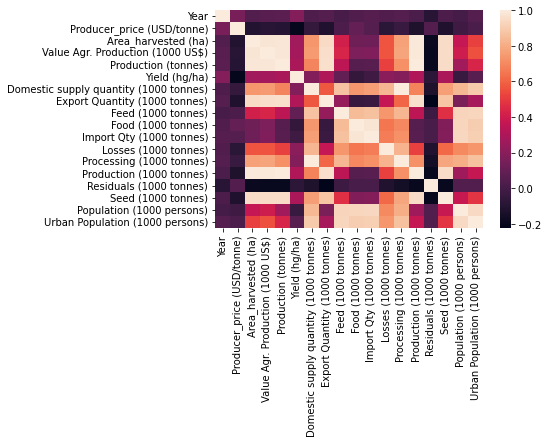

In [75]:
sns.heatmap(df.corr())

In [79]:
#df.to_csv("../raw_data/Dataset_FAS.csv")

In [91]:
prod_mundial = df.groupby('Year')["Production (tonnes)"].sum()/(10**6)

In [92]:
prod_mundial

Year
1991     98.260337
1992    108.998630
1993    108.998104
1994    131.127125
1995    120.699164
1996    123.636944
1997    136.760761
1998    159.022355
1999    156.492952
2000    158.990070
2001    174.667119
2002    179.323945
2003    188.813251
2004    203.935768
2005    212.573042
2006    220.271885
2007    218.362757
2008    229.479675
2009    211.026062
2010    250.215529
2011    247.303976
2012    224.710997
2013    263.614677
2014    292.855997
2015    249.990580
2016    260.243642
2017    172.915330
2018    292.166067
2019    260.758517
2020    284.492786
Name: Production (tonnes), dtype: float64

In [88]:
!pip install plotly

You should consider upgrading via the '/Users/vanessalieberg/.pyenv/versions/3.8.12/envs/project_commodity_prices/bin/python -m pip install --upgrade pip' command.


In [90]:
import plotly.express as px
import plotly.graph_objects as go

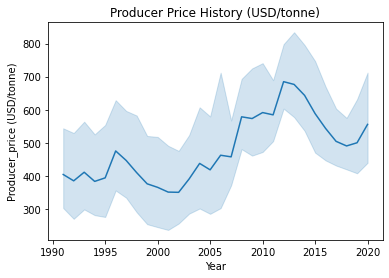

In [52]:
sns.lineplot(x = 'Year', y = 'Producer_price (USD/tonne)', data = df)
plt.title("Producer Price History (USD/tonne)");

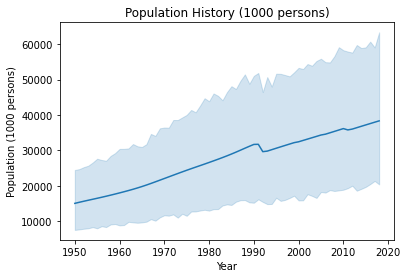

In [53]:
sns.lineplot(x = 'Year', y = 'Population (1000 persons)', data = df)
plt.title("Population History (1000 persons)");

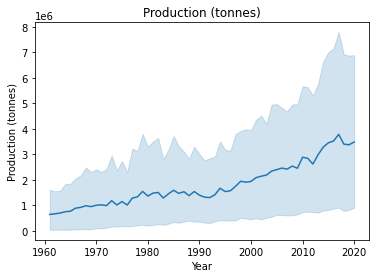

In [58]:
sns.lineplot(x = 'Year', y = 'Production (tonnes)', data = df)
plt.title("Production (tonnes)");

In [ ]:
# Para fazer a media, precisamos fazer um group by por ano! depois a media das colunas



